<a href="https://colab.research.google.com/github/GabrJDiz0n/PortfolioProjects/blob/main/MoF_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: Make sure variables are consistent when checking final draft

In [ ]:
from math import log,e
from scipy import stats
from datetime import date
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({"font.size": 16})

Exercise 0.1

In [ ]:
def black_scholes_merton(stock_price, strike_price, rate, time, volatility, dividend=0.0):

  '''Function that estimates the value of a call and put option using the Black Scholes Merton Model.

  Parameters
  ----------
  stock_price: Spot market value of the underlying asset
  strike_price: Strike price of the options contract
  rate: Risk free rate
  time: Time to expiration for the options contract
  volatility: Volatility of the asset
  dividend: Dividend or yield of the asset, with a default value set to zero

  Returns
  -------
  [call,put]: Returns a list containing the estimated call and put value of the option contract
  '''

  d1 = (log(stock_price/strike_price) + (rate - dividend + volatility**2/2) * time)/(volatility * time**.5)
  d2 = d1 - volatility * time**.5

  call = stats.norm.cdf(d1) * stock_price*e**(-dividend*time) - stats.norm.cdf(d2)*strike_price*e**(-rate*time)
  put = stats.norm.cdf(-d2)*strike_price*e**(-rate * time) - stats.norm.cdf(-d1) * stock_price*e**(-dividend*time)
  delta = stats.norm.cdf(d1)
  gamma = stats.norm.pdf(d1) / (stock_price * volatility * np.sqrt(time))
  theta = ((-stock_price * stats.norm.pdf(d1) * volatility)/(2 * np.sqrt(time))) - (rate * strike_price * e**(-rate * time) * stats.norm.cdf(d2))

  # Print formatted output for Call, Put, and greek values
  print("Call:", call)
  print("Put:", put)
  print("Delta:", delta)
  print("Gamma:", gamma)
  print("Theta:", theta)

  return [call, put, delta, gamma, theta]

In [ ]:
black_scholes_merton(100,100,.05,1,.2,0)

Call: 10.450583572185572
Put: 5.573526022256971
Delta: 0.6368306511756191
Gamma: 0.018762017345846895
Theta: -6.414027546438197


[10.450583572185572,
 5.573526022256971,
 0.6368306511756191,
 0.018762017345846895,
 -6.414027546438197]

Exercise 0.2

In [ ]:
def bsm_forward(stock_price, strike_price, rate, time, volatility, dividend=0.0):

  '''Function that estimates the value of a call and put option using the Black Scholes Merton Model.

  Parameters
  ----------
  stock_price: Spot market value of the underlying asset
  strike_price: Strike price of the options contract
  rate: Risk free rate
  time: Time to expiration for the options contract
  volatility: Volatility of the asset
  dividend: Dividend or yield of the asset, with a default value set to zero

  Returns
  -------
  [forward, delta]: Returns a list containing the estimated forward and delta value of the contract
  '''

  d1 = (log(stock_price/strike_price) + (rate - dividend + volatility**2/2) * time)/(volatility * time**.5)
  d2 = d1 - volatility * time**.5

  forward = e**(rate * time) * stock_price
  delta = e**(rate * time)
  theta = stock_price * r * np.exp(r * T)

  # Print formatted output for Call, Put, and greek values
  print("Forward:", forward)
  print("Delta:", delta)
  print("Theta:", theta)

  return [forward, delta, theta]

In [ ]:
bsm_forward(100,100,.05,1,.2,0)

Forward: 105.12710963760242
Delta: 1.0512710963760241
Theta: 5.256355481880121


[105.12710963760242, 1.0512710963760241, 5.256355481880121]

Exercise 1.1 (Euler)

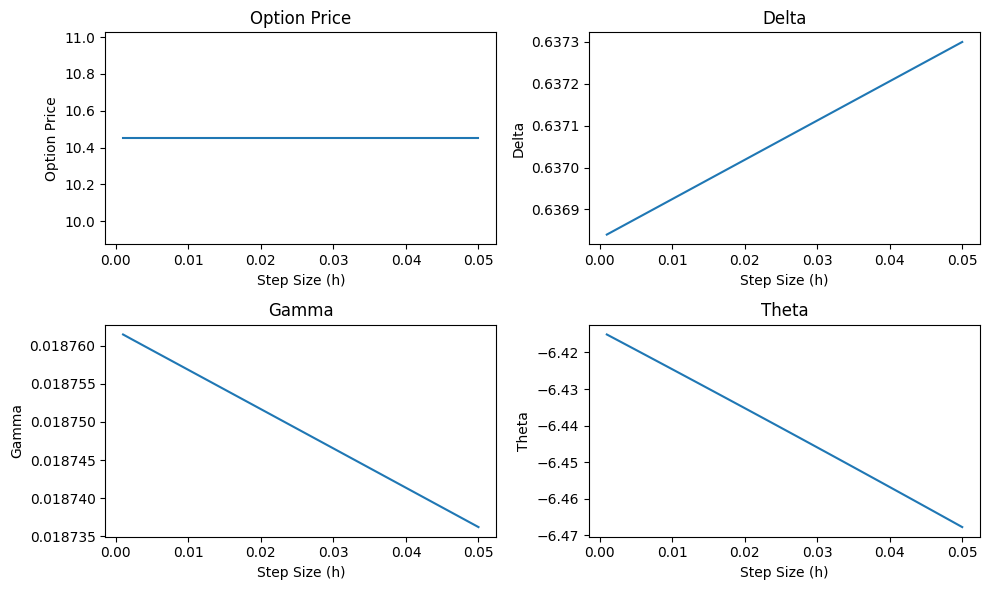

Initial Option Price: 10.450583572185565
Initial Delta: 0.636840032093744
Initial Gamma: 0.01876151145552285
Initial Theta: -6.415077244469103


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
S0 = 100  # Initial stock price
K = 100   # Strike price
r = 0.05  # Risk-free rate
T = 1     # Time to maturity
sigma = 0.2  # Volatility
h_values = np.linspace(0.001, 0.05, 100)  # Range of step sizes for numerical differentiation

# Function to calculate call option price using Black-Scholes formula
def call_option_price(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Function to calculate delta using the Euler method
def delta(S, K, r, sigma, T, h):
    return (call_option_price(S + h, K, r, sigma, T) - call_option_price(S, K, r, sigma, T)) / h

# Function to calculate gamma using the Euler method
def gamma(S, K, r, sigma, T, h):
    return (delta(S + h, K, r, sigma, T, h) - delta(S, K, r, sigma, T, h)) / h

# Function to calculate theta using the Euler method
def theta(S, K, r, sigma, T, h):
    return (call_option_price(S, K, r, sigma, T - h) - call_option_price(S, K, r, sigma, T)) / h

# Calculate option price, delta, gamma, and theta for different step sizes
option_prices = []
deltas = []
gammas = []
thetas = []

for h in h_values:
    option_prices.append(call_option_price(S0, K, r, sigma, T))
    deltas.append(delta(S0, K, r, sigma, T, h))
    gammas.append(gamma(S0, K, r, sigma, T, h))
    thetas.append(theta(S0, K, r, sigma, T, h))

# Initial values
initial_option_price = option_prices[0]
initial_delta = deltas[0]
initial_gamma = gammas[0]
initial_theta = thetas[0]

# Plotting
plt.figure(figsize=(10, 6))

# Plot option price
plt.subplot(2, 2, 1)
plt.plot(h_values, option_prices)
plt.title('Option Price')
plt.xlabel('Step Size (h)')
plt.ylabel('Option Price')

# Plot delta
plt.subplot(2, 2, 2)
plt.plot(h_values, deltas)
plt.title('Delta')
plt.xlabel('Step Size (h)')
plt.ylabel('Delta')

# Plot gamma
plt.subplot(2, 2, 3)
plt.plot(h_values, gammas)
plt.title('Gamma')
plt.xlabel('Step Size (h)')
plt.ylabel('Gamma')

# Plot theta
plt.subplot(2, 2, 4)
plt.plot(h_values, thetas)
plt.title('Theta')
plt.xlabel('Step Size (h)')
plt.ylabel('Theta')

plt.tight_layout()
plt.show()

# Print initial values
print("Initial Option Price:", initial_option_price)
print("Initial Delta:", initial_delta)
print("Initial Gamma:", initial_gamma)
print("Initial Theta:", initial_theta)

Exercise 1.2 (Backwards Euler)

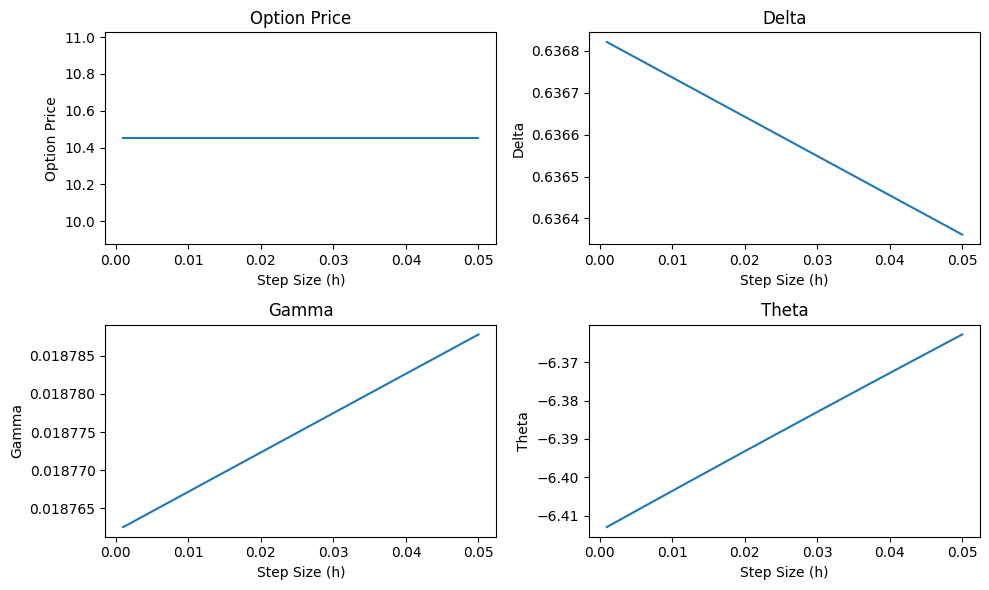

Initial Option Price: 10.450583572185565
Initial Delta: 0.636821270092014
Initial Gamma: 0.01876254884791706
Initial Theta: -6.412978841353834


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
S0 = 100  # Initial stock price
K = 100   # Strike price
r = 0.05  # Risk-free rate
T = 1     # Time to maturity
sigma = 0.2  # Volatility
h_values = np.linspace(0.001, 0.05, 100)  # Range of step sizes for numerical differentiation

# Function to calculate call option price using Black-Scholes formula
def call_option_price(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Function to calculate delta using the Backward Euler method
def delta(S, K, r, sigma, T, h):
    return (call_option_price(S, K, r, sigma, T) - call_option_price(S - h, K, r, sigma, T)) / h

# Function to calculate gamma using the Backward Euler method
def gamma(S, K, r, sigma, T, h):
    return (delta(S, K, r, sigma, T, h) - delta(S - h, K, r, sigma, T, h)) / h

# Function to calculate theta using the Backward Euler method
def theta(S, K, r, sigma, T, h):
    return (call_option_price(S, K, r, sigma, T) - call_option_price(S, K, r, sigma, T + h)) / h

# Calculate option price, delta, gamma, and theta for different step sizes
option_prices = []
deltas = []
gammas = []
thetas = []

for h in h_values:
    option_prices.append(call_option_price(S0, K, r, sigma, T))
    deltas.append(delta(S0, K, r, sigma, T, h))
    gammas.append(gamma(S0, K, r, sigma, T, h))
    thetas.append(theta(S0, K, r, sigma, T, h))

# Initial values
initial_option_price = option_prices[0]
initial_delta = deltas[0]
initial_gamma = gammas[0]
initial_theta = thetas[0]

# Plotting
plt.figure(figsize=(10, 6))

# Plot option price
plt.subplot(2, 2, 1)
plt.plot(h_values, option_prices)
plt.title('Option Price')
plt.xlabel('Step Size (h)')
plt.ylabel('Option Price')

# Plot delta
plt.subplot(2, 2, 2)
plt.plot(h_values, deltas)
plt.title('Delta')
plt.xlabel('Step Size (h)')
plt.ylabel('Delta')

# Plot gamma
plt.subplot(2, 2, 3)
plt.plot(h_values, gammas)
plt.title('Gamma')
plt.xlabel('Step Size (h)')
plt.ylabel('Gamma')

# Plot theta
plt.subplot(2, 2, 4)
plt.plot(h_values, thetas)
plt.title('Theta')
plt.xlabel('Step Size (h)')
plt.ylabel('Theta')

plt.tight_layout()
plt.show()

# Print initial values
print("Initial Option Price:", initial_option_price)
print("Initial Delta:", initial_delta)
print("Initial Gamma:", initial_gamma)
print("Initial Theta:", initial_theta)

Exercise 1.3 (Crank-Nicolson)

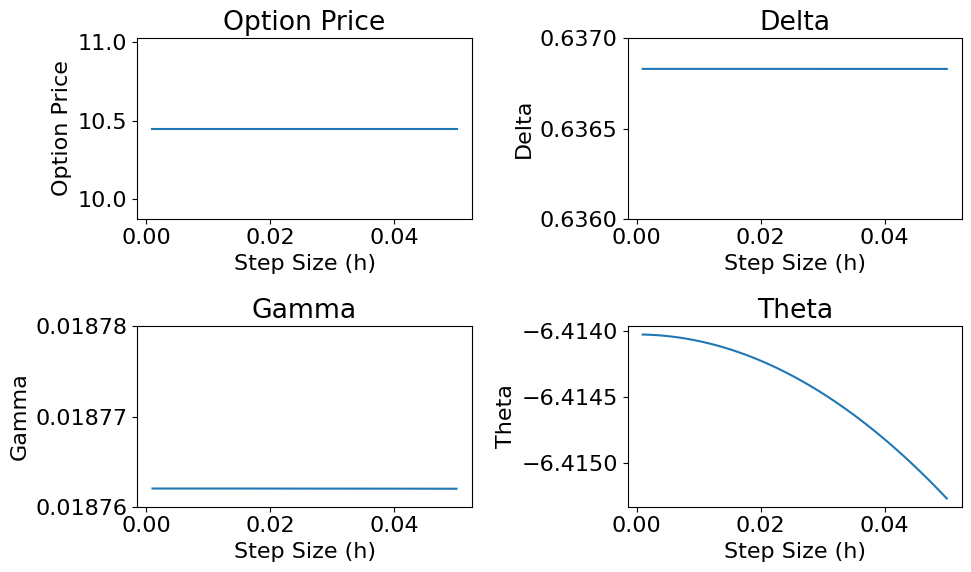

Initial Option Price: 10.450583572185565
Initial Delta: 0.636830651092879
Initial Gamma: 0.01876201594086524
Initial Theta: -6.414028042911468


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
S0 = 100  # Initial stock price
K = 100  # Strike price
r = 0.05  # Risk-free rate
T = 1     # Time to maturity
sigma = 0.2  # Volatility
h_values = np.linspace(0.001, 0.05, 100)  # Range of step sizes for numerical differentiation

# Function to calculate call option price using Black-Scholes formula
def call_option_price(S, K, r, sigma, T):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Function to calculate delta using the Crank-Nicolson method
def delta(S, K, r, sigma, T, h):
    return (call_option_price(S + h, K, r, sigma, T) - call_option_price(S - h, K, r, sigma, T)) / (2 * h)

# Function to calculate gamma using the Crank-Nicolson method
def gamma(S, K, r, sigma, T, h):
    return (delta(S + h, K, r, sigma, T, h) - delta(S - h, K, r, sigma, T, h)) / (2 * h)

# Function to calculate theta using the Crank-Nicolson method
def theta(S, K, r, sigma, T, h):
    return (call_option_price(S, K, r, sigma, T - h) - call_option_price(S, K, r, sigma, T + h)) / (2 * h)

# Calculate option price, delta, gamma, and theta for different step sizes
option_prices = []
deltas = []
gammas = []
thetas = []

for h in h_values:
    option_prices.append(call_option_price(S0, K, r, sigma, T))
    deltas.append(delta(S0, K, r, sigma, T, h))
    gammas.append(gamma(S0, K, r, sigma, T, h))
    thetas.append(theta(S0, K, r, sigma, T, h))

# Initial values
initial_option_price = option_prices[0]
initial_delta = deltas[0]
initial_gamma = gammas[0]
initial_theta = thetas[0]

# Plotting
plt.figure(figsize=(10, 6))

# Plot option price
plt.subplot(2, 2, 1)
plt.plot(h_values, option_prices)
plt.title('Option Price')
plt.xlabel('Step Size (h)')
plt.ylabel('Option Price')

# Plot delta
plt.subplot(2, 2, 2)
plt.plot(h_values, deltas)
plt.title('Delta')
plt.xlabel('Step Size (h)')
plt.ylabel('Delta')
plt.ylim(0.636, 0.637)

# Plot gamma
plt.subplot(2, 2, 3)
plt.plot(h_values, gammas)
plt.title('Gamma')
plt.xlabel('Step Size (h)')
plt.ylabel('Gamma')
plt.ylim(0.01876, 0.01878)

# Plot theta
plt.subplot(2, 2, 4)
plt.plot(h_values, thetas)
plt.title('Theta')
plt.xlabel('Step Size (h)')
plt.ylabel('Theta')

plt.tight_layout()
plt.show()

# Print initial values
print("Initial Option Price:", initial_option_price)
print("Initial Delta:", initial_delta)
print("Initial Gamma:", initial_gamma)
print("Initial Theta:", initial_theta)

Exercise 2.1 (Monte Carlo)

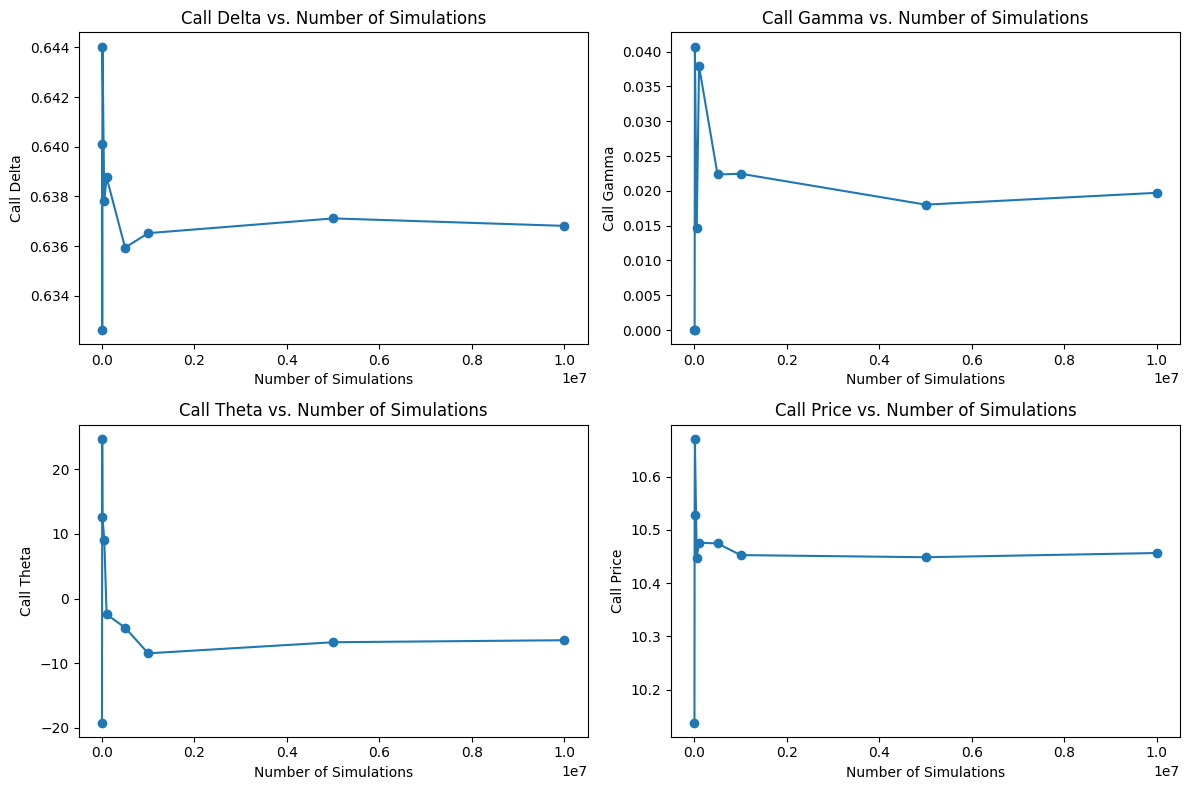

Call Delta:         0.636816162659315
Call Gamma:         0.01972182417375734
Call Theta:         -6.459873178515352
Call Price:         10.46


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

@jit(nopython=True)
def gaussian_box_muller(num_sims):
    """Generate random numbers from a standard normal distribution using Box-Muller transform."""
    u1 = 1.0 - np.random.rand(num_sims)
    u2 = 1.0 - np.random.rand(num_sims)
    z = np.sqrt(-2.0 * np.log(u1)) * np.cos(2 * np.pi * u2)
    return z

@jit(nopython=True)
def monte_carlo_call_price(num_sims, S, K, r, v, T, delta_S):
    """Pricing a European vanilla call option with a Monte Carlo method."""
    # Adjust stock paths
    Sp_adjust = (S + delta_S) * np.exp(T * (r - 0.5 * v * v))
    S_adjust = S * np.exp(T * (r - 0.5 * v * v))
    Sm_adjust = (S - delta_S) * np.exp(T * (r - 0.5 * v * v))

    # Random numbers
    gauss_bm = gaussian_box_muller(num_sims)

    # Adjusted stock paths
    expgauss = np.exp(np.sqrt(v * v * T) * gauss_bm)
    Sp_cur = Sp_adjust * expgauss
    S_cur = S_adjust * expgauss
    Sm_cur = Sm_adjust * expgauss

    # Calculate payoff
    payoff_sum_p = np.sum(np.maximum(Sp_cur - K, 0.0))
    payoff_sum = np.sum(np.maximum(S_cur - K, 0.0))
    payoff_sum_m = np.sum(np.maximum(Sm_cur - K, 0.0))

    # Calculate option prices
    price_Sp = (payoff_sum_p / num_sims) * np.exp(-r * T)
    price_S = (payoff_sum / num_sims) * np.exp(-r * T)
    price_Sm = (payoff_sum_m / num_sims) * np.exp(-r * T)

    return price_Sp, price_S, price_Sm

@jit(nopython=True)
def call_delta_mc(num_sims, S, K, r, v, T, delta_S):
    """Calculate the Delta of a call option using Monte Carlo method."""
    price_Sp, price_S, _ = monte_carlo_call_price(num_sims, S, K, r, v, T, delta_S)
    return (price_Sp - price_S) / delta_S

@jit(nopython=True)
def call_gamma_mc(num_sims, S, K, r, v, T, delta_S):
    """Calculate the Gamma of a call option using Monte Carlo method."""
    price_Sp, price_S, price_Sm = monte_carlo_call_price(num_sims, S, K, r, v, T, delta_S)
    return (price_Sp - 2 * price_S + price_Sm) / (delta_S ** 2)

@jit(nopython=True)
def call_theta_mc(num_sims, S, K, r, v, T, delta_S, dt=0.01):
    """Calculate the Theta of a call option using Monte Carlo method."""
    # Calculate option prices for T and T - dt
    price_Sp, price_S, price_Sm = monte_carlo_call_price(num_sims, S, K, r, v, T, delta_S)
    price_Sp_dt, _, _ = monte_carlo_call_price(num_sims, S, K, r, v, T - dt, delta_S)

    # Calculate theta
    theta = (price_Sp_dt - price_S) / dt
    return theta

if __name__ == "__main__":
    # Parameters
    S = 100.0  # Option price
    delta_S = 0.001  # Option price increment
    K = 100.0  # Strike price
    r = 0.05  # Risk-free rate (5%)
    v = 0.2  # Volatility of the underlying (20%)
    T = 1.0  # One year until expiry
    num_sims_values = [1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000, 10000000]  # Number of simulations

    # Lists to store results
    call_deltas = []
    call_gammas = []
    call_thetas = []
    call_prices = []

    for num_sims in num_sims_values:
        # Calculate Delta, Gamma, Theta, and Price for each value of num_sims
        call_delta_m = call_delta_mc(num_sims, S, K, r, v, T, delta_S)
        call_gamma_m = call_gamma_mc(num_sims, S, K, r, v, T, delta_S)
        call_theta_m = call_theta_mc(num_sims, S, K, r, v, T, delta_S)
        call_price_m = monte_carlo_call_price(num_sims, S, K, r, v, T, delta_S)

        # Append results to lists
        call_deltas.append(call_delta_m)
        call_gammas.append(call_gamma_m)
        call_thetas.append(call_theta_m)
        call_prices.append(call_price_m[1])  # Taking only the middle price

    # Plotting
    plt.figure(figsize=(12, 8))

    # Plot Delta
    plt.subplot(2, 2, 1)
    plt.plot(num_sims_values, call_deltas, marker='o')
    plt.title('Call Delta vs. Number of Simulations')
    plt.xlabel('Number of Simulations')
    plt.ylabel('Call Delta')

    # Plot Gamma
    plt.subplot(2, 2, 2)
    plt.plot(num_sims_values, call_gammas, marker='o')
    plt.title('Call Gamma vs. Number of Simulations')
    plt.xlabel('Number of Simulations')
    plt.ylabel('Call Gamma')

    # Plot Theta
    plt.subplot(2, 2, 3)
    plt.plot(num_sims_values, call_thetas, marker='o')
    plt.title('Call Theta vs. Number of Simulations')
    plt.xlabel('Number of Simulations')
    plt.ylabel('Call Theta')

    # Plot Price
    plt.subplot(2, 2, 4)
    plt.plot(num_sims_values, call_prices, marker='o')
    plt.title('Call Price vs. Number of Simulations')
    plt.xlabel('Number of Simulations')
    plt.ylabel('Call Price')

    plt.tight_layout()
    plt.show()

    # Print values for the largest number of simulations
    largest_num_sims_index = len(num_sims_values) - 1
    print("Call Delta:        ", call_deltas[largest_num_sims_index])
    print("Call Gamma:        ", call_gammas[largest_num_sims_index])
    print("Call Theta:        ", call_thetas[largest_num_sims_index])
    print("Call Price:        ", round(call_prices[largest_num_sims_index], 2))

Exercise 2.2 (Euler-Maruyama)

In [ ]:
import numpy as np

def euler_maruyama_optimized(S0, K, r, sigma, T, num_steps, num_simulations):
    dt = T / num_steps
    dW = np.random.normal(0, np.sqrt(dt), size=(num_simulations, num_steps))

    # Simulate all paths simultaneously
    S = S0 * np.exp(np.cumsum((r - 0.5 * sigma**2) * dt + sigma * dW, axis=1))

    # Calculate payoffs and option price
    ST = S[:, -1]  # Final stock prices
    payoff = np.maximum(ST - K, 0)  # Call option payoff
    option_price = np.mean(payoff) * np.exp(-r * T)  # Discounted expected payoff

    # Calculate delta
    S0_increment = 0.01 * S0
    ST_plus = S[:, -1] * (1 + r * dt + sigma * np.sqrt(dt))  # Final stock prices with incremented S0
    payoff_plus = np.maximum(ST_plus - K, 0)  # Call option payoff with incremented S0
    delta = np.mean(payoff_plus - payoff) / S0_increment

    # Calculate gamma
    ST_minus = S[:, -1] * (1 + r * dt - sigma * np.sqrt(dt))  # Final stock prices with decremented S0
    payoff_minus = np.maximum(ST_minus - K, 0)  # Call option payoff with decremented S0
    delta_minus = np.mean(payoff - payoff_minus) / S0_increment
    gamma = (delta - delta_minus) / S0_increment

    # Calculate theta
    option_price_minus_1 = np.mean(np.maximum(S[:, -2] - K, 0)) * np.exp(-r * (T - dt))  # Option price at T-dt
    theta = (option_price_minus_1 - option_price) / dt

    return option_price, delta, gamma, theta

# Example usage
S0 = 100  # Initial stock price
K = 100  # Strike price
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility
T = 1  # Time to expiration
num_steps = 1000  # Number of time steps
num_simulations = 100000  # Number of simulations

price, delta, gamma, theta = euler_maruyama_optimized(S0, K, r, sigma, T, num_steps, num_simulations)
print("Call Option Price:", price)
print("Delta:", delta)
print("Gamma:", gamma)
print("Theta:", theta)

Call Option Price: 10.436679236911116
Delta: 0.43017597988073647
Gamma: 0.014347243937844978
Theta: -6.850513159095684


Exercise 2.3 (Milstein)

In [ ]:
import numpy as np

def milstein_method_optimized(S0, K, r, sigma, T, num_steps, num_simulations):
    dt = T / num_steps
    dW = np.random.normal(0, np.sqrt(dt), size=(num_simulations, num_steps))

    # Simulate all paths simultaneously
    S = np.zeros((num_simulations, num_steps + 1))
    S[:, 0] = S0
    for i in range(num_steps):
        dW_squared_minus_dt = dW[:, i]**2 - dt
        S[:, i+1] = S[:, i] * (1 + r * dt + sigma * dW[:, i] + 0.5 * sigma**2 * dW_squared_minus_dt)  # Milstein method

    # Calculate payoffs and option price
    ST = S[:, -1]  # Final stock prices
    payoff = np.maximum(ST - K, 0)  # Call option payoff
    option_price = np.mean(payoff) * np.exp(-r * T)  # Discounted expected payoff

    # Calculate delta
    S0_increment = 0.01 * S0
    ST_plus = S[:, -1] * (1 + r * dt + sigma * np.sqrt(dt) + 0.5 * sigma**2 * np.sqrt(dt)**2)  # Final stock prices with incremented S0
    payoff_plus = np.maximum(ST_plus - K, 0)  # Call option payoff with incremented S0
    delta = np.mean(payoff_plus - payoff) / S0_increment

    # Calculate gamma
    ST_minus = S[:, -1] * (1 + r * dt - sigma * np.sqrt(dt) + 0.5 * sigma**2 * np.sqrt(dt)**2)  # Final stock prices with decremented S0
    payoff_minus = np.maximum(ST_minus - K, 0)  # Call option payoff with decremented S0
    delta_minus = np.mean(payoff - payoff_minus) / S0_increment
    gamma = (delta - delta_minus) / S0_increment

    # Calculate theta
    option_price_minus_1 = np.mean(np.maximum(S[:, -2] - K, 0)) * np.exp(-r * (T - dt))  # Option price at T-dt
    theta = (option_price_minus_1 - option_price) / dt

    return option_price, delta, gamma, theta

# Example usage
S0 = 100  # Initial stock price
K = 100  # Strike price
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility
T = 1  # Time to expiration
num_steps = 1000  # Number of time steps
num_simulations = 100000  # Number of simulations

price, delta, gamma, theta = milstein_method_optimized(S0, K, r, sigma, T, num_steps, num_simulations)
print("Call Option Price:", price)
print("Delta:", delta)
print("Gamma:", gamma)
print("Theta:", theta)

Call Option Price: 10.473271818682315
Delta: 0.4335522156856186
Gamma: 0.016902024108905678
Theta: -6.761613501723218


Exercise 2.5 (lnSt)

In [ ]:
import numpy as np

def euler_maruyama_log_optimized(S0, K, r, sigma, T, num_steps, num_simulations):
    dt = T / num_steps
    dW = np.random.normal(0, np.sqrt(dt), size=(num_simulations, num_steps))

    # Initialize the array for log(S) and set the initial values
    ln_S = np.log(S0) + np.cumsum((r - 0.5 * sigma**2) * dt + sigma * dW, axis=1)

    # Calculate the final stock prices from log values
    ST = np.exp(ln_S[:, -1])
    payoff = np.maximum(ST - K, 0)  # Call option payoff
    option_price = np.mean(payoff) * np.exp(-r * T)  # Discounted expected payoff

    # Calculate delta
    S0_increment = 0.01 * S0
    ln_ST_plus = ln_S[:, -1] + np.log(1 + r * dt + sigma * np.sqrt(dt))
    ST_plus = np.exp(ln_ST_plus)
    payoff_plus = np.maximum(ST_plus - K, 0)
    delta = np.mean(payoff_plus - payoff) / S0_increment

    # Calculate gamma
    ln_ST_minus = ln_S[:, -1] + np.log(1 + r * dt - sigma * np.sqrt(dt))
    ST_minus = np.exp(ln_ST_minus)
    payoff_minus = np.maximum(ST_minus - K, 0)
    delta_minus = np.mean(payoff - payoff_minus) / S0_increment
    gamma = (delta - delta_minus) / S0_increment

    # Calculate theta
    option_price_minus_1 = np.mean(np.maximum(np.exp(ln_S[:, -2]) - K, 0)) * np.exp(-r * (T - dt))
    theta = (option_price_minus_1 - option_price) / dt

    return option_price, delta, gamma, theta

# Example usage
S0 = 100  # Initial stock price
K = 100  # Strike price
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility
T = 1  # Time to expiration
num_steps = 1000  # Number of time steps
num_simulations = 100000  # Number of simulations

price, delta, gamma, theta = euler_maruyama_log_optimized(S0, K, r, sigma, T, num_steps, num_simulations)
print("Eul: Call Option Price:", price)
print("Eul: Delta:", delta)
print("Eul: Gamma:", gamma)
print("Eul: Theta:", theta)

import numpy as np

def milstein_method_log_optimized(S0, K, r, sigma, T, num_steps, num_simulations):
    dt = T / num_steps
    dW = np.random.normal(0, np.sqrt(dt), size=(num_simulations, num_steps))

    # Simulate all paths simultaneously for ln(S)
    ln_S = np.zeros((num_simulations, num_steps + 1))
    ln_S[:, 0] = np.log(S0)
    for i in range(num_steps):
        dW_squared_minus_dt = dW[:, i]**2 - dt
        ln_S[:, i+1] = ln_S[:, i] + (r - 0.5 * sigma**2) * dt + sigma * dW[:, i] + 0.5 * sigma**2 * dW_squared_minus_dt

    # Final log stock prices
    ln_ST = ln_S[:, -1]
    ST = np.exp(ln_ST)  # Convert log prices back to regular prices for calculation
    payoff = np.maximum(ST - K, 0)  # Call option payoff
    option_price = np.mean(payoff) * np.exp(-r * T)  # Discounted expected payoff

    # Calculation of delta, gamma, theta remains the same but needs to use the adjusted ST for accuracy
    S0_increment = 0.01 * S0
    ln_ST_plus = ln_ST + np.log(1 + r * dt + sigma * np.sqrt(dt) + 0.5 * sigma**2 * np.sqrt(dt)**2)
    ST_plus = np.exp(ln_ST_plus)
    payoff_plus = np.maximum(ST_plus - K, 0)
    delta = np.mean(payoff_plus - payoff) / S0_increment

    ln_ST_minus = ln_ST + np.log(1 + r * dt - sigma * np.sqrt(dt) + 0.5 * sigma**2 * np.sqrt(dt)**2)
    ST_minus = np.exp(ln_ST_minus)
    payoff_minus = np.maximum(ST_minus - K, 0)
    delta_minus = np.mean(payoff - payoff_minus) / S0_increment
    gamma = (delta - delta_minus) / S0_increment

    option_price_minus_1 = np.mean(np.maximum(np.exp(ln_S[:, -2]) - K, 0)) * np.exp(-r * (T - dt))
    theta = (option_price_minus_1 - option_price) / dt

    return option_price, delta, gamma, theta

# Example usage
S0 = 100  # Initial stock price
K = 100  # Strike price
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility
T = 1  # Time to expiration
num_steps = 1000  # Number of time steps
num_simulations = 100000  # Number of simulations

price, delta, gamma, theta = milstein_method_log_optimized(S0, K, r, sigma, T, num_steps, num_simulations)
print("Mil Call Option Price:", price)
print("Mil Delta:", delta)
print("Mil Gamma:", gamma)
print("Mil Theta:", theta)

Eul: Call Option Price: 10.425724104658336
Eul: Delta: 0.43081138688776294
Eul: Gamma: 0.014811475954024378
Eul: Theta: -6.5614070730593
Mil Call Option Price: 10.433532215656136
Mil Delta: 0.4322544247139781
Mil Gamma: 0.017326560446347172
Mil Theta: -6.8225371898194


Exercise 3.1 (Forward PDE)

In [ ]:
import numpy as np

# Parameters
S0 = 100  # Initial stock price
K = 100   # Strike price
r = 0.05  # Risk-free rate
T = 1     # Time to maturity
sigma = 0.2  # Volatility
h = 0.000000001 # Step size for numerical differentiation

# Function to calculate forward price
def forward_price(S, r, T):
    return S * np.exp(r * T)

# Calculate and print forward price
forward = forward_price(S0, r, T)
print("Forward Price:", forward)

# Function to calculate delta for a forward contract using finite differences
def forward_delta(S, r, T, h):
    return (forward_price(S + h, r, T) - forward_price(S - h, r, T)) / (2 * h)

# Function to calculate gamma for a forward contract using finite differences
def forward_gamma(S, r, T, h):
    return (forward_price(S + h, r, T) - 2 * forward_price(S, r, T) + forward_price(S - h, r, T)) / (h**2)

# Function to calculate theta for a forward contract
def forward_theta(S, r, T, h):
    forward_price_current = forward_price(S, r, T)
    forward_price_future = forward_price(S, r, T - h)  # We're assuming T - h is in the future
    return (forward_price_current - forward_price_future) / h

# Calculate delta, gamma, and theta for the forward contract
delta_value_forward = forward_delta(S0, r, T, h)
gamma_value_forward = forward_gamma(S0, r, T, h)
theta_value_forward = forward_theta(S0, r, T, h)

# Print results
print("Forward Delta:", delta_value_forward)
print("Forward Gamma:", gamma_value_forward)
print("Forward Theta:", theta_value_forward)

Forward Price: 105.12710963760242
Forward Delta: 1.0512763992664986
Forward Gamma: 0.0
Forward Theta: 5.256381996332493


Exercise 3.2 (Forward MC)

In [ ]:
import numpy as np

# Parameters
S0 = 100   # initial stock price
K = 100    # strike price
r = 0.05   # risk-free rate
sigma = 0.2  # volatility
T = 1      # time to maturity (in years)
N = 10000  # number of simulations
epsilon = 0.01  # small change for perturbation

# Generate random paths for the stock price
np.random.seed(42)
z = np.random.standard_normal((N,))
ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z)

# Calculate the forward price
forward_price = np.mean(ST)

# Perturb S0 and calculate forward price for delta
S0_perturbed = S0 + epsilon
ST_perturbed = S0_perturbed * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z)
forward_price_perturbed = np.mean(ST_perturbed)
delta = (forward_price_perturbed - forward_price) / epsilon

# Perturb S0 again for gamma calculation
S0_perturbed = S0 + epsilon
ST_perturbed = S0_perturbed * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z)
forward_price_perturbed = np.mean(ST_perturbed)

# Perturb S0 in the opposite direction for gamma calculation
S0_perturbed_minus = S0 - epsilon
ST_perturbed_minus = S0_perturbed_minus * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z)
forward_price_perturbed_minus = np.mean(ST_perturbed_minus)

gamma = (forward_price_perturbed - 2 * forward_price + forward_price_perturbed_minus) / epsilon**2

# Perturb T and calculate forward price for theta
T_perturbed = T - epsilon  # Perturb T in the opposite direction
ST_perturbed = S0 * np.exp((r - 0.5 * sigma**2) * T_perturbed + sigma * np.sqrt(T_perturbed) * z)
forward_price_perturbed = np.mean(ST_perturbed)
theta = (forward_price - forward_price_perturbed) / epsilon


print("Forward Price:", forward_price)
print("Delta:", delta)
print("Gamma:", gamma)
print("Theta:", theta)

Forward Price: 105.09703823314912
Delta: 1.050970382331684
Gamma: 0.0
Theta: 5.2461837245218135


Exercise 4.1 (Call Spread MC)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S1 = 100
S2 = 90
K = 8
T = 1
r = 0.05
sigma1 = 0.2
sigma2 = 0.3
rho = 0.5
num_simulations = 1000000

# Forward Prices
F1 = np.exp(r)*S1
F2 = np.exp(r)*S2

# We calculate the drift adjusted by the price of the forward, allowing the simulations of prices of the underlying to behave accordingly to future market expectations, leading to a more accurate and realistic estimation.
drift1 = np.log(F1/S1)
drift2 = np.log(F2/S2)

def monte_carlo_spread_option_price(drift1, drift2, K, T, r, sigma1, sigma2, rho, num_simulations):
    np.random.seed(0)

    # Simulation setup
    dt = T
    dW1 = np.random.standard_normal(num_simulations)
    dW2 = np.random.standard_normal(num_simulations)
    dW3 = rho * dW1 + np.sqrt(1 - rho**2) * dW2

    # GBM formula
    S1_T = S1 * np.exp((drift1 - sigma1**2 / 2) * dt + sigma1 * np.sqrt(dt) * dW1)
    S2_T = S2 * np.exp((drift2 - sigma2**2 / 2) * dt + sigma2 * np.sqrt(dt) * dW3)

    # Payoff calculation
    payoff_T = np.maximum(S1_T - S2_T - K, 0)

    # Discounted payoff
    discounted_payoff = np.exp(-r * T) * payoff_T
    option_price = np.mean(discounted_payoff)

    return option_price

def monte_carlo_spread_greeks(drift1, drift2, K, T, r, sigma1, sigma2, rho, num_simulations):
    np.random.seed(0)

    # Delta calculation using finite difference method
    d_drift1 = 0.01  # Small change in drift1
    drift1_up = drift1 + d_drift1
    drift1_down = drift1 - d_drift1
    dS1 = 0.01 * S1

    option_price_up = monte_carlo_spread_option_price(drift1_up, drift2, K, T, r, sigma1, sigma2, rho, num_simulations)
    option_price_down = monte_carlo_spread_option_price(drift1_down, drift2, K, T, r, sigma1, sigma2, rho, num_simulations)
    delta = (option_price_up - option_price_down) / (2 * dS1)

    # Gamma calculation
    gamma = (option_price_up - 2 * option_price + option_price_down) / (dS1**2)

    # Theta calculation using finite difference method
    dt = 1 / 252  # One day
    T_up = T + dt
    T_down = T - dt

    option_price_up = monte_carlo_spread_option_price(drift1, drift2, K, T_up, r, sigma1, sigma2, rho, num_simulations)
    option_price_down = monte_carlo_spread_option_price(drift1, drift2, K, T_down, r, sigma1, sigma2, rho, num_simulations)
    theta = (option_price_down - option_price_up) / (2 * dt)

    return delta, gamma, theta

# Call the function to get option price, delta, gamma, and theta
option_price = monte_carlo_spread_option_price(drift1, drift2, K, T, r, sigma1, sigma2, rho, num_simulations)
delta, gamma, theta = monte_carlo_spread_greeks(drift1, drift2, K, T, r, sigma1, sigma2, rho, num_simulations)

# Print the results
print(f'The price of the spread call option using original Monte Carlo is: {option_price}')
print(f'Delta: {delta}, Gamma: {gamma}, Theta: {theta}')

The price of the spread call option using original Monte Carlo is: 10.969544043731505
Delta: 0.5905993438148274, Gamma: 0.02164347772560582, Theta: -5.03179628897205


Exercise 4.2 (Correlation Plot)

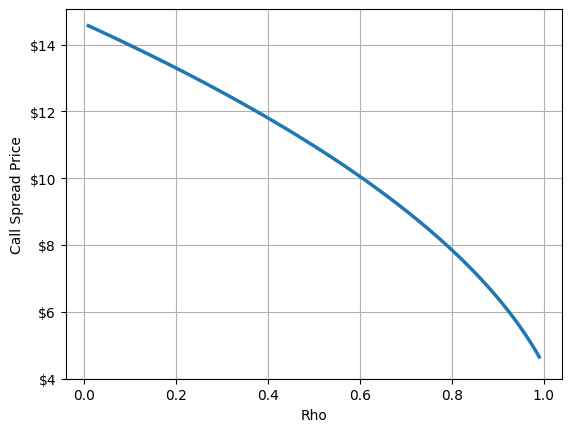

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S1 = 100
S2 = 90
K = 8
T = 1
r = 0.05
sigma1 = 0.2
sigma2 = 0.3
num_simulations = 1000000

plt.plot(np.arange(.01,1,.01),[monte_carlo_spread_option_price(drift1, drift2, K, T, r, sigma1, sigma2, x, num_simulations) for x in np.arange(.01,1,.01)],lw=2.5)
plt.yticks(range(4,16,2),['$'+str(i) for i in range(4,16,2)])
plt.xlabel('Rho')
plt.ylabel('Call Spread Price')
plt.grid();

Exercises 5.2-4 (Monthly, Weekly, and Daily Distribution)

Std. deviation = 0.0420
Mean = -0.0896
Rebalancing frequency = 1.0000 days



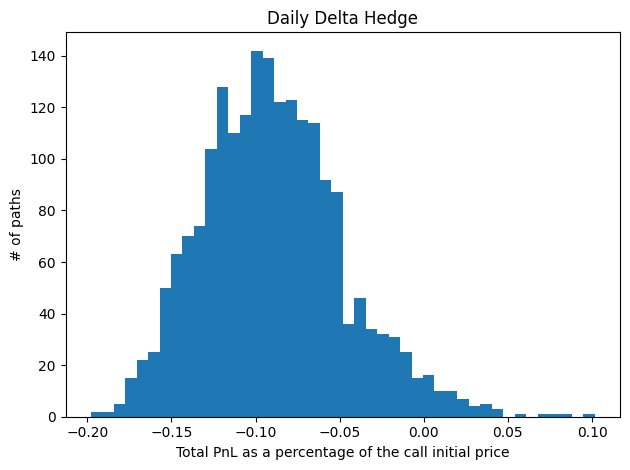

In [ ]:
# Load needed libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm, lognorm
from sklearn.linear_model import LinearRegression
from IPython.display import display
from PIL import Image

# Simulation general parameters
NDAYS_YEAR      = 52 # number of trading days per year
N_SIMS          = 2000 # number of simulations
REBAL_FREQ      = 1/(52*1) # frequency of rebalancing


# Simulation underlying parameters
INI_PRICE       = 100 # stock initial price
STRIKE_PRICE    = 100 # strike price
YEARS_TO_EXP    = 1   # years until expiration
DRIFT           = 0.07 # stocks drift
ANNUALIZED_VOL  = 0.2 # process volatility
RISK_FREE_RATE  = 0.05 # risk-free rate

# Define Black-Scholes functions for call option

def calculate_call_delta(S, K, r, T, sigma):
    """
    Calculate the delta of an European call option using the Black-Scholes formula.

    Parameters:
    S (float): Current stock price.
    K (float): Strike price.
    r (float): Risk-free rate.
    T (float): Time to maturity (in years).
    sigma (float): Volatility.

    Returns:
    float: Delta of the call option.
    """

    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1)

    return delta

def calculate_call_price(S, K, r, T, sigma):
    """
    Calculate the price of an European call option using the Black-Scholes formula.

    Parameters:
    S (float): Current stock price.
    K (float): Strike price.
    r (float): Risk-free rate.
    T (float): Time to maturity (in years).
    sigma (float): Volatility.

    Returns:
    float: Price of the call option.
    """

    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    N_d1 = 0.5 * (1 + math.erf(d1 / np.sqrt(2)))
    N_d2 = 0.5 * (1 + math.erf(d2 / np.sqrt(2)))

    price = S * N_d1 - K * np.exp(-r * T) * N_d2

    return price

# Step volatility
daily_vol = ANNUALIZED_VOL*np.sqrt(REBAL_FREQ)

# Create a log-normal distribution object (sigma^2/2 is substracted from the mean)
lognorm_dist = lognorm(s = daily_vol,
                       scale = np.exp(DRIFT - 0.5*(daily_vol)**2))

# Dataframe containing simulated paths
dfPaths = pd.DataFrame(np.nan,
                       index = np.arange(start = YEARS_TO_EXP, stop = 0.0, step = -REBAL_FREQ),
                       columns = [f'Path{i}' for i in range(1, N_SIMS+1)])

# Initial price is fixed
dfPaths.iloc[0, :] = INI_PRICE

# Generate random values for all steps in one go
random_values = np.random.rand(dfPaths.shape[0] - 1, dfPaths.shape[1])

# Calculate the new values using vectorized operations
for idx in range(dfPaths.shape[0]-1):
    dfPaths.iloc[idx+1, :] = dfPaths.iloc[idx,:]*lognorm_dist.ppf(random_values[idx,:])

# Dataframe containing call delta
dfDelta = pd.DataFrame(np.nan,
                       index = np.arange(start = YEARS_TO_EXP, stop = 0.0, step = -REBAL_FREQ),
                       columns = [f'Delta for path{i}' for i in range(1, N_SIMS+1)])

# Dataframe containing hedging PnL
dfHedgingPnL = pd.DataFrame(np.nan,
                            index = np.arange(start = YEARS_TO_EXP, stop = 0.0, step = -REBAL_FREQ),
                            columns = [f'Hedging PnL for path{i}' for i in range(1, N_SIMS+1)])

# Go across each path and compute delta and hedging PnL
for idx_step in range(dfPaths.shape[0]):

    dfDelta.iloc[idx_step, :] = calculate_call_delta(dfPaths.iloc[idx_step, :],
                                                    STRIKE_PRICE,
                                                    RISK_FREE_RATE,
                                                    dfPaths.index[idx_step],
                                                    ANNUALIZED_VOL)

    if idx_step != 0:
        dfHedgingPnL.iloc[idx_step, :] = -dfDelta.iloc[idx_step-1, :].values*\
                                            (dfPaths.iloc[idx_step, :] - dfPaths.iloc[idx_step-1, :])

# Dataframe containing total PnL at each step
dfTotPnL = pd.DataFrame(np.nan,
                        index = np.arange(start = YEARS_TO_EXP, stop = 0.0, step = -REBAL_FREQ),
                        columns = [f'Total PnL for path{i}' for i in range(1, N_SIMS+1)])

# Go across each path and compute total PnL (option PNL + hedging PnL)
dfHedgingPnL_cumsum = dfHedgingPnL.cumsum(axis=0)
positive_diff = np.maximum(dfPaths.values - STRIKE_PRICE, 0)

for idx_step in range(dfPaths.shape[0]):
    dfTotPnL.iloc[idx_step, :] = dfHedgingPnL_cumsum.iloc[idx_step, :].values + positive_diff[idx_step, :]

# Plot an histogram with the returns of an dynamically delta-hedged call option
# PnL will be shown as a portion of the call premium

call_init_price = calculate_call_price(INI_PRICE, STRIKE_PRICE, 0.0, YEARS_TO_EXP, ANNUALIZED_VOL)

fig, ax = plt.subplots()
returns_dist = dfTotPnL.iloc[-1,:]/call_init_price - 1
returns_dist.plot.hist(bins = int(np.sqrt(N_SIMS)), legend = False)
plt.xlabel('Total PnL as a percentage of the call initial price')
plt.ylabel('# of paths')
plt.title('Daily Delta Hedge')
plt.tight_layout()

print('Std. deviation = ' + "{:.4f}".format(returns_dist.std()))
print('Mean = ' + "{:.4f}".format(returns_dist.mean()))
print('Rebalancing frequency = ' + "{:.4f}".format(REBAL_FREQ*NDAYS_YEAR) + ' days\n')